In [ ]:
!pip install datasets

In [ ]:
!pip install transformers==4.17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 46.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.17.0 which is incompatible.


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Map:   0%|          | 0/7557 [00:00<?, ? examples/s]

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Using amp half precision backend
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: evidence, input_text, statement, __index_level_0__, id, reason. If evidence, input_text, statement, __index_level_0__, id, reason are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples =

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dbotchuei (dbotchuei-university-of-cape-coast-ghana) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc Roc
0,No log,0.673543,0.583861,0.642306,0.522447,0.423931,0.693311
1,No log,0.584378,0.713608,0.732377,0.685792,0.685480,0.789793
2,0.626400,0.646892,0.719937,0.730295,0.696356,0.698092,0.790109
3,0.626400,0.661678,0.731013,0.740314,0.709153,0.711845,0.800515
4,0.493100,0.682716,0.737342,0.746835,0.716032,0.719113,0.804391


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: evidence, input_text, statement, id, reason. If evidence, input_text, statement, id, reason are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1264
  Batch size = 16
Saving model checkpoint to ./model_output/checkpoint-236
Configuration saved in ./model_output/checkpoint-236/config.json
Model weights saved in ./model_output/checkpoint-236/pytorch_model.bin
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: evidence, in

Training completed in 1437.90 seconds.


/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


Evaluation Results: {'eval_loss': 0.682715892791748, 'eval_accuracy': 0.7373417721518988, 'eval_precision': 0.7468354430379747, 'eval_recall': 0.7160319123710157, 'eval_f1': 0.7191133672286434, 'eval_auc_roc': 0.8043913931448066, 'eval_runtime': 15.3384, 'eval_samples_per_second': 82.408, 'eval_steps_per_second': 5.15, 'epoch': 5.0}


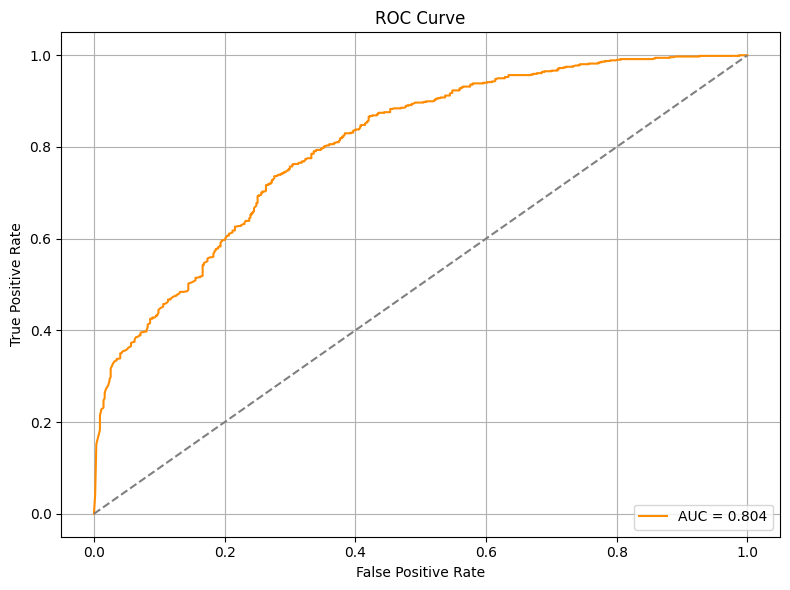

In [ ]:
import torch
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping (handle imbalance)
label2id = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
id2label = {v: k for k, v in label2id.items()}

# Load model and tokenizer for BERT
MODEL_ID = "bert-base-uncased"
config = AutoConfig.from_pretrained(
    MODEL_ID,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    hidden_dropout_prob=0.3,
    attention_probs_dropout_prob=0.3
)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID, config=config).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

# Load and preprocess data
def load_and_preprocess_data(train_path: str, test_path: str):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    train_data.dropna(subset=["statement", "evidence", "label"], inplace=True)
    test_data.dropna(subset=["statement", "evidence", "label"], inplace=True)
    train_data["input_text"] = train_data["statement"] + " [SEP] " + train_data["evidence"]
    test_data["input_text"] = test_data["statement"] + " [SEP] " + test_data["evidence"]
    train_data["label"] = train_data["label"].map(label2id)
    test_data["label"] = test_data["label"].map(label2id)
    train_dataset = Dataset.from_pandas(train_data).shuffle(seed=SEED)
    test_dataset = Dataset.from_pandas(test_data).shuffle(seed=SEED)
    return train_dataset, test_dataset

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["input_text"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

# Training arguments (UPDATED: use AUC-ROC as metric for best model)
training_args = TrainingArguments(
    output_dir="./model_output",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    weight_decay=0.05,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="auc_roc",  # <-- Use AUC-ROC
    greater_is_better=True,           # <-- Higher AUC-ROC is better
    seed=SEED,
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=2,
)

# Store last ROC for plotting
last_probs = None
last_labels = None

def compute_metrics(eval_pred):
    global last_probs, last_labels
    logits, labels = eval_pred
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)
    auc_roc = roc_auc_score(labels, probs)

    # Save for ROC plotting
    last_probs = probs
    last_labels = labels

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "auc_roc": auc_roc}

# Plot ROC Curve
def plot_roc_curve(probs, labels):
    fpr, tpr, _ = roc_curve(labels, probs)
    auc_score = roc_auc_score(labels, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color="darkorange")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Train and evaluate
def train_and_evaluate(train_path: str, test_path: str):
    train_dataset, test_dataset = load_and_preprocess_data(train_path, test_path)
    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)
    data_collator = DataCollatorWithPadding(tokenizer)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
    )
    start_time = time.time()
    trainer.train()
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")

    # Evaluate
    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)

    # Plot ROC
    plot_roc_curve(last_probs, last_labels)

# Entry point
if __name__ == "__main__":
    train_path = "train_no_empty_evidence.csv"
    test_path = "test_no_empty_evidence.csv"
    train_and_evaluate(train_path, test_path)

In [ ]:
# Save the model and tokenizer after training is complete
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")
print("Model and tokenizer saved to './saved_model' directory.")

Configuration saved in ./saved_model/config.json
Model weights saved in ./saved_model/pytorch_model.bin
tokenizer config file saved in ./saved_model/tokenizer_config.json
Special tokens file saved in ./saved_model/special_tokens_map.json


Model and tokenizer saved to './saved_model' directory.


In [ ]:
from torch.optim import AdamW

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1439: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolved_archive_file, map

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Map:   0%|          | 0/7557 [00:00<?, ? examples/s]

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Using amp half precision backend
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: __index_level_0__, reason, statement, evidence, id, input_text. If __index_level_0__, reason, statement, evidence, id, input_text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 7557
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2365
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dbotchuei (dbotchuei-university-of-cape-coast-ghana) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc Roc
1,0.573400,0.585683,0.690665,0.739738,0.652132,0.640294,0.792469
2,0.488100,0.573947,0.727848,0.729694,0.710264,0.713163,0.802116
3,0.330300,0.778954,0.709652,0.722277,0.683822,0.684175,0.801673


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: reason, statement, evidence, id, input_text. If reason, statement, evidence, id, input_text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1264
  Batch size = 16
Saving model checkpoint to ./model_output/checkpoint-473
Configuration saved in ./model_output/checkpoint-473/config.json
Model weights saved in ./model_output/checkpoint-473/pytorch_model.bin
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ign

Configuration saved in ./model_output/config.json


Evaluation Results: {'eval_loss': 0.5739470720291138, 'eval_accuracy': 0.7278481012658228, 'eval_precision': 0.7296941978647608, 'eval_recall': 0.7102644320867724, 'eval_f1': 0.7131631374101194, 'eval_auc_roc': 0.802115762661302, 'eval_runtime': 7.5139, 'eval_samples_per_second': 168.221, 'eval_steps_per_second': 10.514, 'epoch': 3.0}


Model weights saved in ./model_output/pytorch_model.bin
tokenizer config file saved in ./model_output/tokenizer_config.json
Special tokens file saved in ./model_output/special_tokens_map.json
The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: reason, statement, evidence, id, input_text. If reason, statement, evidence, id, input_text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1264
  Batch size = 16
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


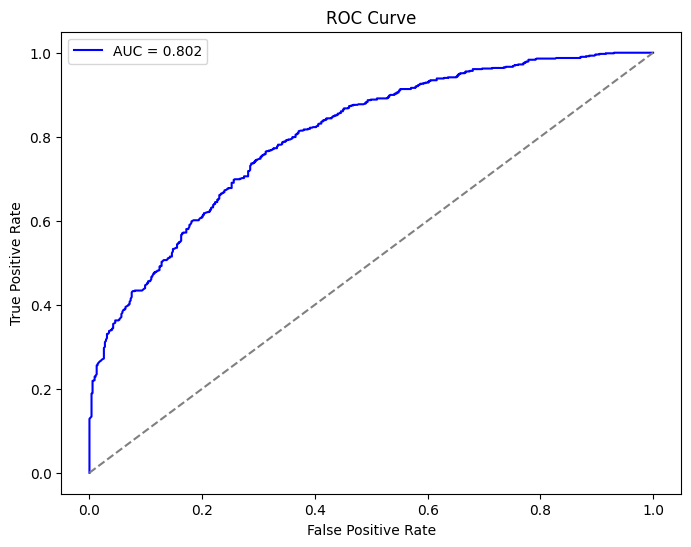

In [ ]:
import torch
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from transformers import (AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding, EarlyStoppingCallback)
from datasets import Dataset
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve

# Set random seed
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping
label2id = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
id2label = {v: k for k, v in label2id.items()}

# Load model and tokenizer
MODEL_ID = "distilbert-base-uncased"
config = AutoConfig.from_pretrained(MODEL_ID, num_labels=2, id2label=id2label, label2id=label2id)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID, config=config).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

def load_and_preprocess_data(train_path: str, test_path: str):
    train_data = pd.read_csv(train_path).dropna(subset=["statement", "evidence", "label"])
    test_data = pd.read_csv(test_path).dropna(subset=["statement", "evidence", "label"])

    train_data["input_text"] = train_data["statement"] + " [SEP] " + train_data["evidence"]
    test_data["input_text"] = test_data["statement"] + " [SEP] " + test_data["evidence"]

    train_data["label"] = train_data["label"].map(label2id)
    test_data["label"] = test_data["label"].map(label2id)

    return Dataset.from_pandas(train_data).shuffle(seed=SEED), Dataset.from_pandas(test_data).shuffle(seed=SEED)

def tokenize_function(examples):
    return tokenizer(examples["input_text"], padding="max_length", truncation=True, max_length=512)

training_args = TrainingArguments(
    output_dir="./model_output",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    weight_decay=0.05,
    logging_strategy="steps",
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_auc_roc",
    greater_is_better=True,
    seed=SEED,
    fp16=torch.cuda.is_available(),
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)
    auc_roc = roc_auc_score(labels, probs)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "auc_roc": auc_roc}

def plot_roc_curve(labels, probs, save_path="roc_curve.png"):
    fpr, tpr, _ = roc_curve(labels, probs)
    auc_score = roc_auc_score(labels, probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

def train_and_evaluate(train_path: str, test_path: str):
    train_dataset, test_dataset = load_and_preprocess_data(train_path, test_path)

    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

    data_collator = DataCollatorWithPadding(tokenizer)
    optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
        optimizers=(optimizer, None),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
    )

    trainer.train()
    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)

    model.save_pretrained("./model_output")
    tokenizer.save_pretrained("./model_output")

    # Compute ROC Curve
    predictions = trainer.predict(tokenized_test_dataset)
    logits = predictions.predictions  # Extract logits
    labels = predictions.label_ids  # Extract actual labels
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    plot_roc_curve(labels, probs)

if __name__ == "__main__":
    train_and_evaluate("train_no_empty_evidence.csv", "test_no_empty_evidence.csv")

In [ ]:
# Save the model and tokenizer after training is complete
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")
print("Model and tokenizer saved to './saved_model' directory.")

Configuration saved in ./saved_model/config.json
Model weights saved in ./saved_model/pytorch_model.bin
tokenizer config file saved in ./saved_model/tokenizer_config.json
Special tokens file saved in ./saved_model/special_tokens_map.json


Model and tokenizer saved to './saved_model' directory.


In [ ]:
import time
import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from torch.optim import AdamW  # Correct import here
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)

In [ ]:
#xlnet

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from transformers import XLNetTokenizer, XLNetForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Labels mapping
class_names = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}

# Tokenizer
PRE_TRAINED_MODEL_NAME = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
MAX_LEN = 400

# Load data
train_path = "train_no_empty_evidence.csv"
test_path = "test_no_empty_evidence.csv"
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Ensure correct columns
train_data['combined_statement'] = train_data['statement'] + " " + train_data['evidence']
test_data['combined_statement'] = test_data['statement'] + " " + test_data['evidence']

train_data = train_data[['combined_statement', 'label']]
test_data = test_data[['combined_statement', 'label']]

# Convert the 'label' column to numerical values
train_data['label'] = train_data['label'].map(class_names)
test_data['label'] = test_data['label'].map(class_names)

# Split Data
df_train, df_val = train_test_split(train_data, test_size=0.2, random_state=101)
df_test = test_data

class FactCheckingDataset(Dataset):
    def __init__(self, statements, targets, tokenizer, max_len):
        self.statements = statements
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.statements)

    def __getitem__(self, item):
        statement = str(self.statements[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
            statement,
            add_special_tokens=True,
            max_length=self.max_len,
            return_attention_mask=True,
            return_tensors='pt',
            padding="max_length",
            truncation=True
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'targets': torch.tensor(target, dtype=torch.long)
        }

def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = FactCheckingDataset(
        statements=df.combined_statement.to_numpy(),
        targets=df.label.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(ds, batch_size=batch_size, num_workers=4, shuffle=True)

BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

# Model
model = XLNetForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=2)
model = model.to(device)

# Class weights
class_weights = torch.tensor([1.2, 1.0]).to(device)
loss_function = torch.nn.CrossEntropyLoss(weight=class_weights)

# Optimizer & Scheduler
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

def train_epoch(model, data_loader, optimizer, device, scheduler, loss_function):
    model.train()
    total_loss = 0
    correct_preds = 0
    total_samples = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
        loss, logits = outputs.loss, outputs.logits

        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        _, predictions = torch.max(logits, dim=1)
        correct_preds += (predictions == targets).sum().item()
        total_samples += targets.size(0)

    avg_loss = total_loss / len(data_loader)
    accuracy = correct_preds / total_samples
    return accuracy, avg_loss

def train_epoch(model, data_loader, optimizer, device, scheduler, loss_function):
    model.train()
    total_loss = 0
    correct_preds = 0
    total_samples = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
        loss, logits = outputs.loss, outputs.logits

        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        _, predictions = torch.max(logits, dim=1)
        correct_preds += (predictions == targets).sum().item()
        total_samples += targets.size(0)

    avg_loss = total_loss / len(data_loader)
    accuracy = correct_preds / total_samples
    return accuracy, avg_loss

def eval_epoch(model, data_loader, device, loss_function):
    model.eval()
    total_loss = 0
    correct_preds = 0
    total_samples = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
            loss, logits = outputs.loss, outputs.logits

            total_loss += loss.item()
            _, predictions = torch.max(logits, dim=1)
            correct_preds += (predictions == targets).sum().item()
            total_samples += targets.size(0)

    avg_loss = total_loss / len(data_loader)
    accuracy = correct_preds / total_samples
    return accuracy, avg_loss

# Training Loop
best_accuracy = 0
start_time = time.time()

# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(EPOCHS):
    train_acc, train_loss = train_epoch(model, train_data_loader, optimizer, device, scheduler, loss_function)
    val_acc, val_loss = eval_epoch(model, val_data_loader, device, loss_function)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{EPOCHS}')
    print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
    print(f'Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}')
    print('-' * 50)

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_curves.png')
plt.close()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_curves.png')
plt.close()

# Evaluation function with ROC curve and confusion matrix
def evaluate_model(model, data_loader, device):
    model.eval()
    correct_preds = 0
    total_samples = 0
    all_targets = []
    all_predictions = []
    all_probs = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            probs = torch.nn.functional.softmax(logits, dim=1)
            _, predictions = torch.max(probs, dim=1)

            correct_preds += (predictions == targets).sum().item()
            total_samples += targets.size(0)

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())  # Probability for class 1

    accuracy = correct_preds / total_samples
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(
        all_targets, all_predictions, average='weighted'
    )
    auc_roc = metrics.roc_auc_score(all_targets, all_probs)

    # Plot ROC curve
    fpr, tpr, _ = metrics.roc_curve(all_targets, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('roc_curve.png')
    plt.close()

    # Generate confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png')
    plt.close()

    return accuracy, precision, recall, f1, auc_roc, all_targets, all_predictions, all_probs

# Evaluate
test_acc, test_precision, test_recall, test_f1, test_auc_roc, y_true, y_pred, y_probs = evaluate_model(model, test_data_loader, device)
print(f"\nTest Results:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC ROC: {test_auc_roc:.4f}")

# Save Model & Tokenizer
model.save_pretrained("./model_output")
tokenizer.save_pretrained("./model_output")

print("\nVisualizations saved:")
print("- loss_curves.png (Training and validation loss)")
print("- accuracy_curves.png (Training and validation accuracy)")
print("- roc_curve.png (ROC curve)")
print("- confusion_matrix.png (Confusion matrix)")

<ipython-input-5-ee42d516e9ec>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'] = train_data['label'].map(class_names)
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias',

Epoch 1/5
Train Loss: 0.6498 | Val Loss: 0.6138
Train Acc: 0.6015 | Val Acc: 0.6621
--------------------------------------------------
Epoch 2/5
Train Loss: 0.5508 | Val Loss: 0.5450
Train Acc: 0.7016 | Val Acc: 0.6967
--------------------------------------------------
Epoch 3/5
Train Loss: 0.4306 | Val Loss: 0.6569
Train Acc: 0.7855 | Val Acc: 0.6850
--------------------------------------------------
Epoch 4/5
Train Loss: 0.2865 | Val Loss: 0.8301
Train Acc: 0.8698 | Val Acc: 0.6948
--------------------------------------------------
Epoch 5/5
Train Loss: 0.1584 | Val Loss: 0.9948
Train Acc: 0.9361 | Val Acc: 0.7000
--------------------------------------------------
Training completed in 4588.99 seconds.

Test Results:
Accuracy: 0.7152
Precision: 0.7182
Recall: 0.7152
F1 Score: 0.7064
AUC ROC: 0.7896

Visualizations saved:
- loss_curves.png (Training and validation loss)
- accuracy_curves.png (Training and validation accuracy)
- roc_curve.png (ROC curve)
- confusion_matrix.png (Confusi

In [ ]:
# Save the model and tokenizer after training is complete
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")
print("Model and tokenizer saved to './saved_model' directory.")

Model and tokenizer saved to './saved_model' directory.


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
